In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
# Lire le fichier CSV
train_data = pd.read_csv("/content/drive/MyDrive/Projet_ML_Regression/data/train_data.csv")
test_data=pd.read_csv("/content/drive/MyDrive/Projet_ML_Regression/data/test_data.csv")

# **Code SVR – Prédiction des trois scores :**

Résultats pour math score (Test):
 - RMSE: 7.121206727664424
 - R² score: 0.7670253812737949
----------------------------------------
Résultats pour reading_writing_score (Test):
 - RMSE: 6.212430497153595
 - R² score: 0.8246495872433062
----------------------------------------
Résultats pour total score (Test):
 - RMSE: 5.745836678611237
 - R² score: 0.8371986140639942
----------------------------------------
   gender  parental level of education  lunch  test preparation course  \
0       0                            1      0                        1   
1       1                            4      0                        0   
2       1                            4      0                        0   
3       0                            3      1                        0   
4       1                            0      0                        1   
5       1                            1      1                        0   
6       1                            0      1                       

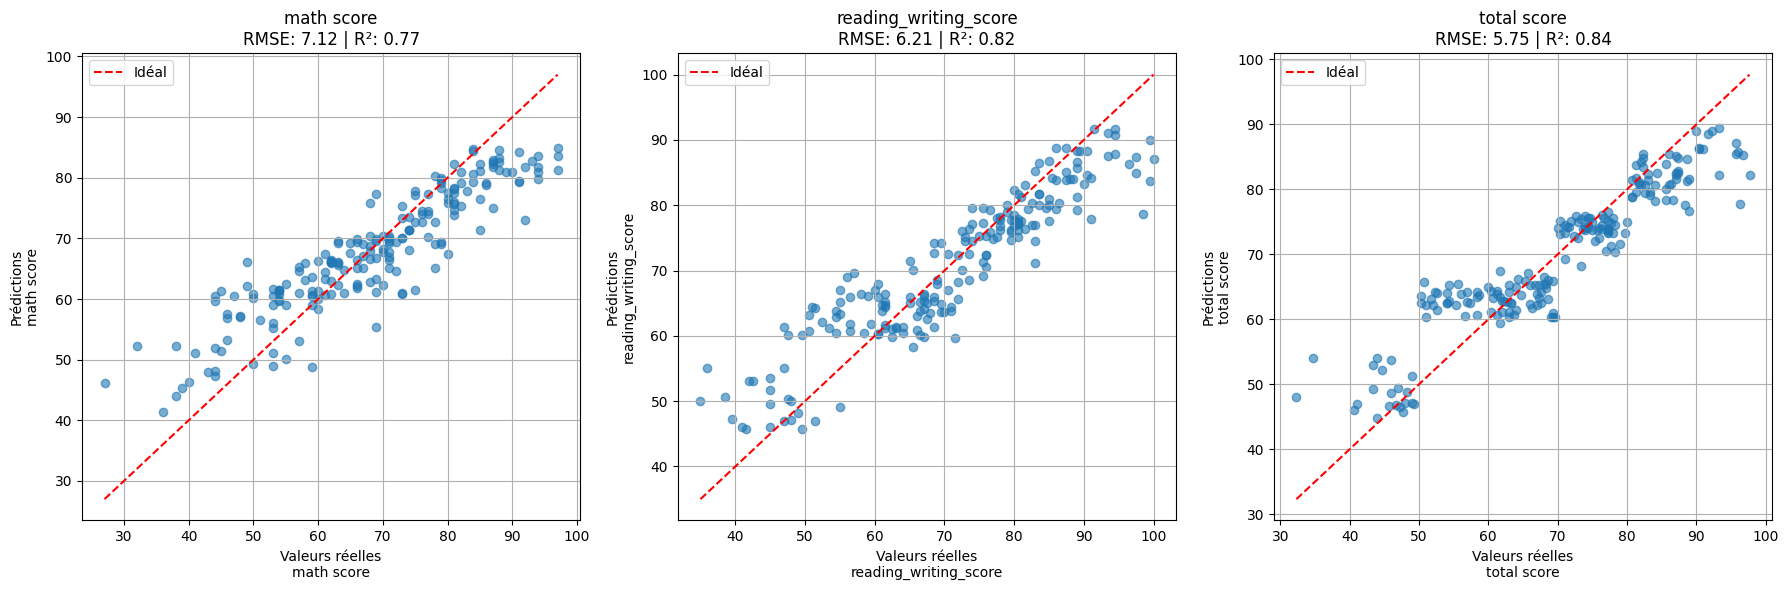

In [26]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Supposons que train_data et test_data sont déjà chargés
target_columns = ['math score', 'reading_writing_score', 'total score']

# Préparation des données
X_train = train_data.drop(columns=target_columns)
X_test = test_data.drop(columns=target_columns)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = []
predictions = {}

# Entraînement et prédiction pour chaque cible
for target in target_columns:
    y_train = train_data[target]
    y_test = test_data[target]

    model = SVR(kernel='rbf')
    model.fit(X_train_scaled, y_train)
    y_pred_test = model.predict(X_test_scaled)

    predictions[f'predicted_{target}'] = y_pred_test

    # Affichage console des métriques
    print(f"Résultats pour {target} (Test):")
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2 = r2_score(y_test, y_pred_test)
    results.append({
        'Modèle': 'SVR',
        'Cible': target,
        'RMSE': rmse,
        'R2': r2
    })
    print(" - RMSE:", rmse)
    print(" - R² score:", r2)
    print("-" * 40)

# Création du DataFrame avec les prédictions et les erreurs
test_predictions = pd.DataFrame(predictions, index=test_data.index)
test_data_with_predictions = pd.concat([test_data, test_predictions], axis=1)

for target in target_columns:
    pred_col = f'predicted_{target}'
    error_col = f'error_{target}'
    test_data_with_predictions[error_col] = abs(test_data_with_predictions[target] - test_data_with_predictions[pred_col])

print(test_data_with_predictions.head(10))

# Affichage des 3 graphiques côte à côte
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, target in enumerate(target_columns):
    pred_col = f'predicted_{target}'
    y_test = test_data_with_predictions[target]
    y_pred = test_data_with_predictions[pred_col]

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    ax = axes[i]
    ax.scatter(y_test, y_pred, alpha=0.6)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Idéal')
    ax.set_xlabel(f'Valeurs réelles\n{target}')
    ax.set_ylabel(f'Prédictions\n{target}')
    ax.set_title(f'{target}\nRMSE: {rmse:.2f} | R²: {r2:.2f}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()



# **RandomForestRegressor multivarié**

Résultats pour math score (Test):
 - RMSE: 5.999
 - R² score: 0.835
----------------------------------------
Résultats pour reading_writing_score (Test):
 - RMSE: 5.820
 - R² score: 0.846
----------------------------------------
Résultats pour total score (Test):
 - RMSE: 4.960
 - R² score: 0.879
----------------------------------------
   gender  parental level of education  lunch  test preparation course  \
0       0                            1      0                        1   
1       1                            4      0                        0   
2       1                            4      0                        0   
3       0                            3      1                        0   
4       1                            0      0                        1   
5       1                            1      1                        0   
6       1                            0      1                        1   
7       0                            4      1                        

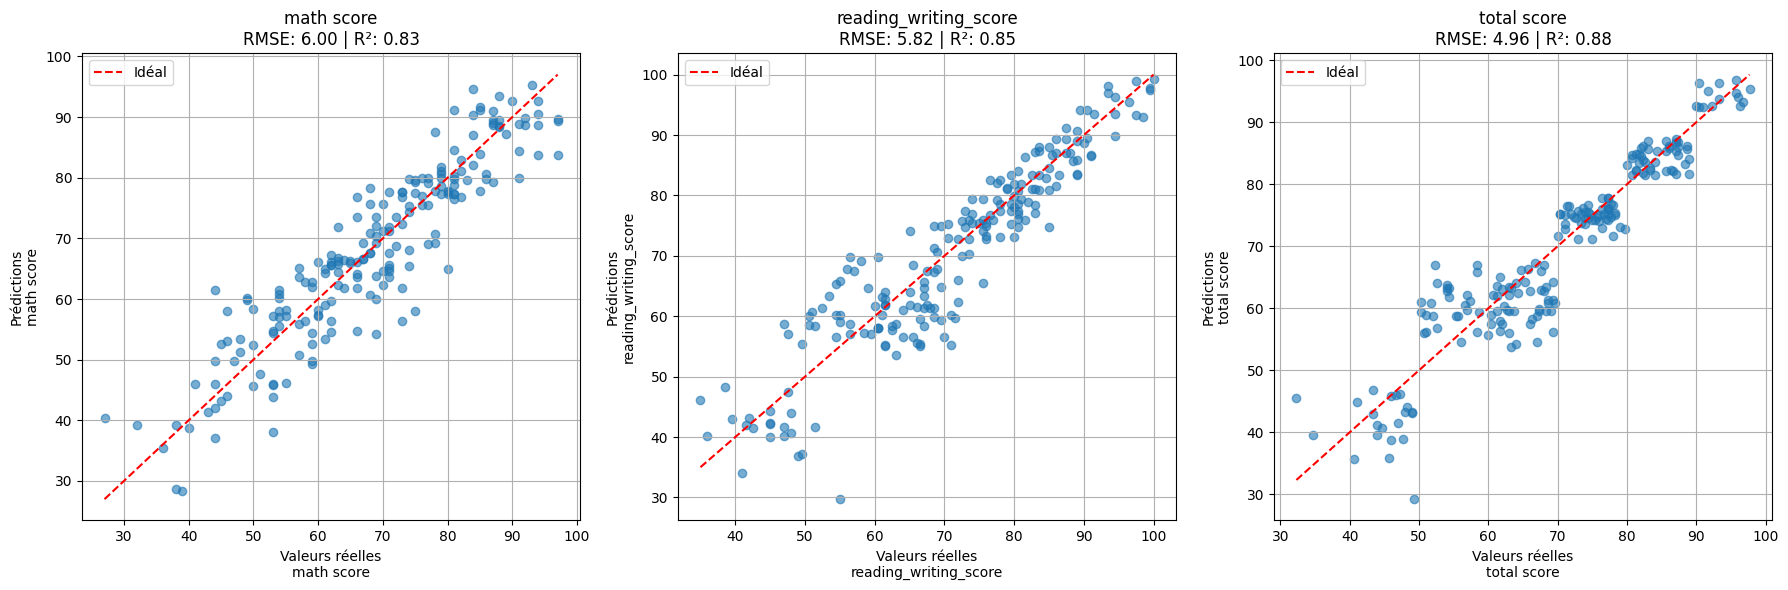

In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Supposons que train_data et test_data sont déjà chargés
target_columns = ['math score', 'reading_writing_score', 'total score']

# Séparation des features et des cibles
X_train = train_data.drop(columns=target_columns)
X_test = test_data.drop(columns=target_columns)

y_train = train_data[target_columns]
y_test = test_data[target_columns]

# Standardisation (optionnelle avec RandomForest mais conservée pour homogénéité)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialisation du modèle
rf = RandomForestRegressor(n_estimators=100, random_state=42)
multi_rf = MultiOutputRegressor(rf)
multi_rf.fit(X_train_scaled, y_train)

# Prédictions
y_pred_test = multi_rf.predict(X_test_scaled)

# Convertir les prédictions en DataFrame
predictions = pd.DataFrame(y_pred_test, index=test_data.index, columns=target_columns)

for target in target_columns:
    rmse = np.sqrt(mean_squared_error(y_test[target], predictions[target]))
    r2 = r2_score(y_test[target], predictions[target])
    results.append({
        'Modèle': 'RandomForest',
        'Cible': target,
        'RMSE': rmse,
        'R2': r2
    })
    print(f"Résultats pour {target} (Test):")
    print(f" - RMSE: {rmse:.3f}")
    print(f" - R² score: {r2:.3f}")
    print("-" * 40)

# Ajouter prédictions et erreurs au test_data
test_data_with_predictions = pd.concat([test_data, predictions.add_prefix('predicted_')], axis=1)

for target in target_columns:
    pred_col = f'predicted_{target}'
    error_col = f'error_{target}'
    test_data_with_predictions[error_col] = abs(test_data_with_predictions[target] - test_data_with_predictions[pred_col])

print(test_data_with_predictions.head(10))

# Affichage des 3 graphiques côte à côte
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, target in enumerate(target_columns):
    y_true = test_data_with_predictions[target]
    y_pred = test_data_with_predictions[f'predicted_{target}']

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    ax = axes[i]
    ax.scatter(y_true, y_pred, alpha=0.6)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Idéal')
    ax.set_xlabel(f'Valeurs réelles\n{target}')
    ax.set_ylabel(f'Prédictions\n{target}')
    ax.set_title(f'{target}\nRMSE: {rmse:.2f} | R²: {r2:.2f}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


# **Avec GradientBoostingRegressor (de scikit-learn)**


Résultats pour math score (Test):
 - RMSE: 5.628
 - R² score: 0.854
----------------------------------------
Résultats pour reading_writing_score (Test):
 - RMSE: 5.278
 - R² score: 0.873
----------------------------------------
Résultats pour total score (Test):
 - RMSE: 4.518
 - R² score: 0.899
----------------------------------------
   gender  parental level of education  lunch  test preparation course  \
0       0                            1      0                        1   
1       1                            4      0                        0   
2       1                            4      0                        0   
3       0                            3      1                        0   
4       1                            0      0                        1   
5       1                            1      1                        0   
6       1                            0      1                        1   
7       0                            4      1                        

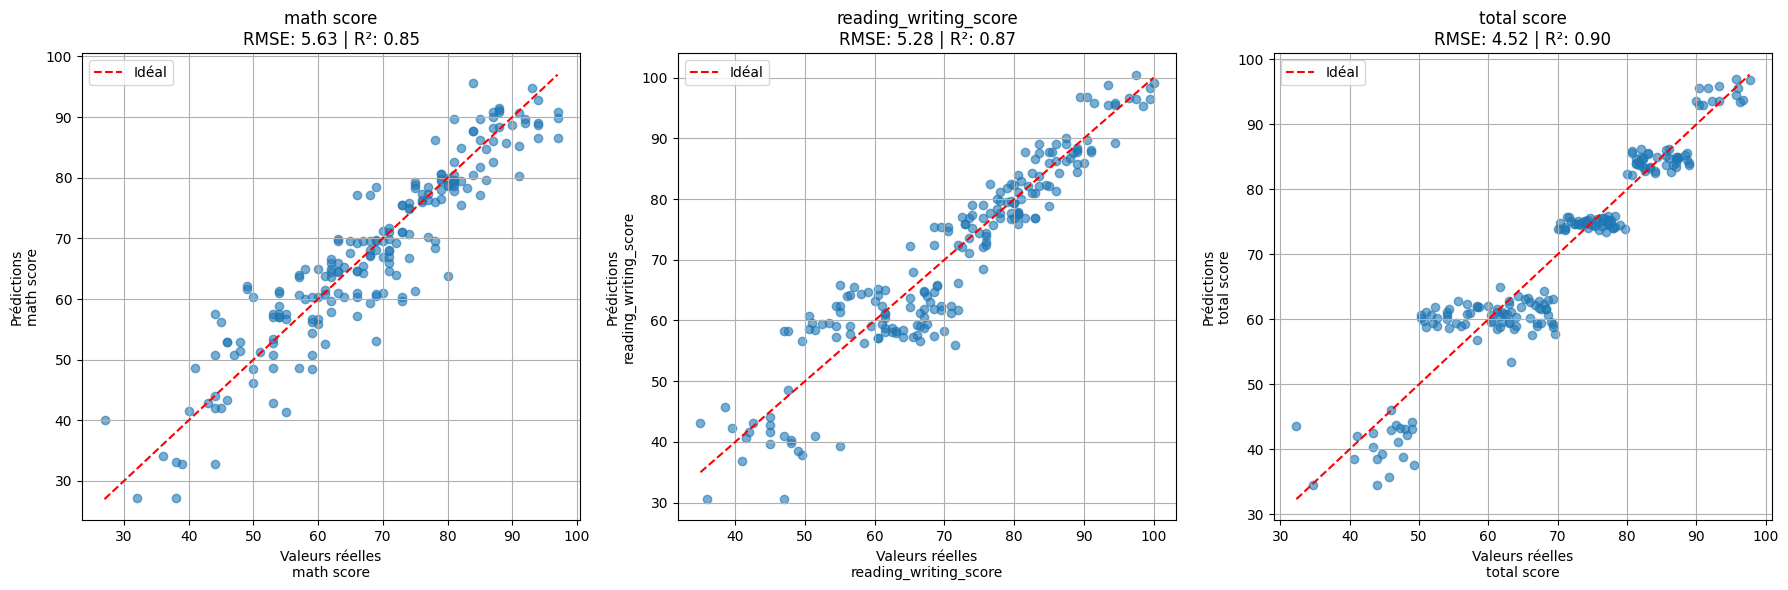

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Supposons que train_data et test_data sont déjà chargés
target_columns = ['math score', 'reading_writing_score', 'total score']

X_train = train_data.drop(columns=target_columns)
X_test = test_data.drop(columns=target_columns)

y_train = train_data[target_columns]
y_test = test_data[target_columns]

# Optionnel : scaler les données (GradientBoosting n’en a pas forcément besoin)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser GradientBoosting et MultiOutputRegressor
gbr = GradientBoostingRegressor(random_state=42, n_estimators=100)
multi_gbr = MultiOutputRegressor(gbr)
multi_gbr.fit(X_train_scaled, y_train)

# Prédiction sur test
y_pred_test = multi_gbr.predict(X_test_scaled)

# Convertir prédictions en DataFrame
predictions = pd.DataFrame(y_pred_test, index=test_data.index, columns=target_columns)
for target in target_columns:
    rmse = np.sqrt(mean_squared_error(y_test[target], predictions[target]))
    r2 = r2_score(y_test[target], predictions[target])
    results.append({
        'Modèle': 'GBR',
        'Cible': target,
        'RMSE': rmse,
        'R2': r2
    })
    print(f"Résultats pour {target} (Test):")
    print(f" - RMSE: {rmse:.3f}")
    print(f" - R² score: {r2:.3f}")
    print("-" * 40)

# Ajouter prédictions au DataFrame test
test_data_with_predictions = pd.concat([test_data, predictions.add_prefix('predicted_')], axis=1)

# Calculer erreur absolue par cible
for target in target_columns:
    pred_col = f'predicted_{target}'
    error_col = f'error_{target}'
    test_data_with_predictions[error_col] = abs(test_data_with_predictions[target] - test_data_with_predictions[pred_col])

print(test_data_with_predictions.head(10))

# Affichage des 3 graphiques côte à côte
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, target in enumerate(target_columns):
    y_true = test_data_with_predictions[target]
    y_pred = test_data_with_predictions[f'predicted_{target}']

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    ax = axes[i]
    ax.scatter(y_true, y_pred, alpha=0.6)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Idéal')
    ax.set_xlabel(f'Valeurs réelles\n{target}')
    ax.set_ylabel(f'Prédictions\n{target}')
    ax.set_title(f'{target}\nRMSE: {rmse:.2f} | R²: {r2:.2f}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


# **Avec XGBoost**

Résultats pour math score (Test):
 - RMSE: 6.457
 - R² score: 0.808
----------------------------------------
Résultats pour reading_writing_score (Test):
 - RMSE: 6.420
 - R² score: 0.813
----------------------------------------
Résultats pour total score (Test):
 - RMSE: 5.624
 - R² score: 0.844
----------------------------------------
   gender  parental level of education  lunch  test preparation course  \
0       0                            1      0                        1   
1       1                            4      0                        0   
2       1                            4      0                        0   
3       0                            3      1                        0   
4       1                            0      0                        1   
5       1                            1      1                        0   
6       1                            0      1                        1   
7       0                            4      1                        

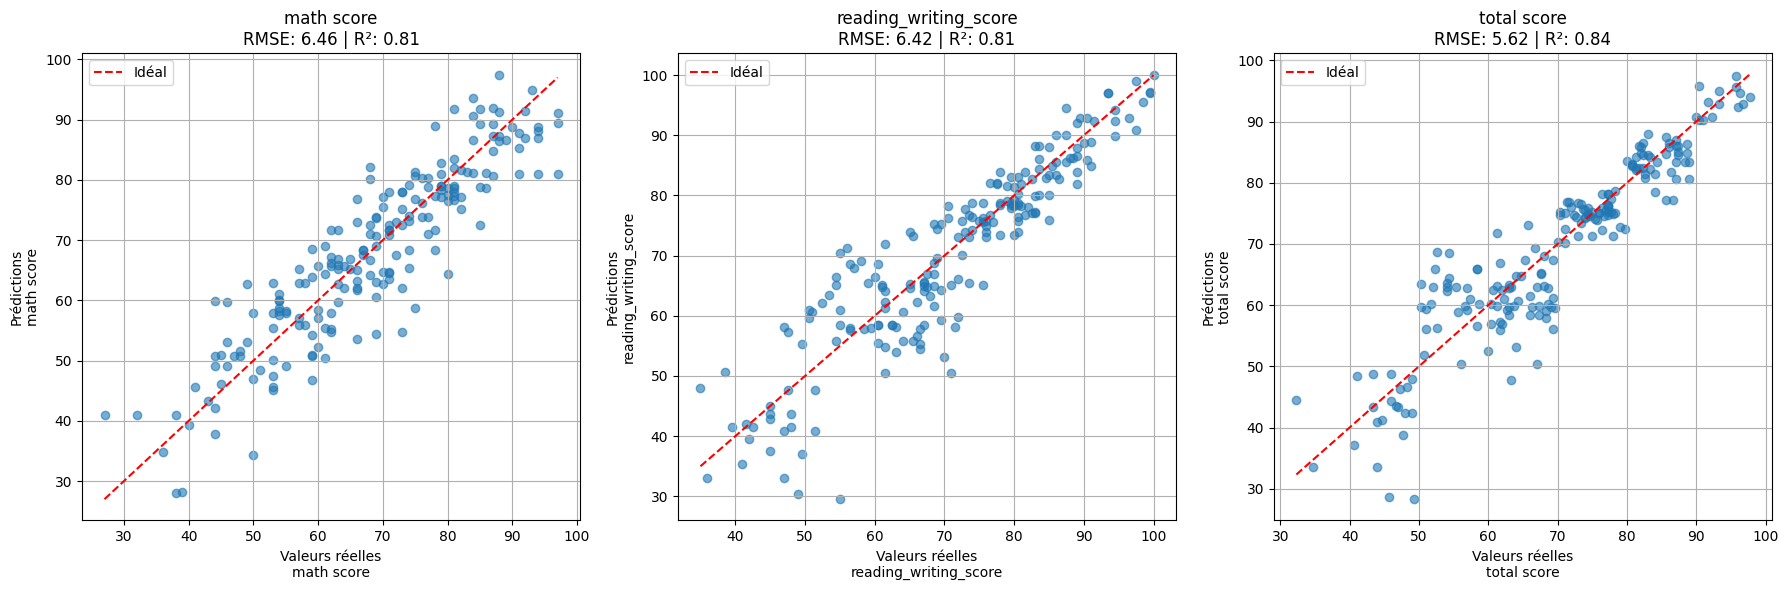

In [29]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Supposons que train_data et test_data sont déjà chargés
target_columns = ['math score', 'reading_writing_score', 'total score']

X_train = train_data.drop(columns=target_columns)
X_test = test_data.drop(columns=target_columns)

y_train = train_data[target_columns]
y_test = test_data[target_columns]

# Le scaling n'est pas obligatoire avec XGBoost mais possible
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser XGBRegressor et envelopper en MultiOutputRegressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100)
multi_xgb = MultiOutputRegressor(xgb)
multi_xgb.fit(X_train_scaled, y_train)

# Prédiction sur test
y_pred_test = multi_xgb.predict(X_test_scaled)

# Convertir les prédictions en DataFrame
predictions = pd.DataFrame(y_pred_test, index=test_data.index, columns=target_columns)
for target in target_columns:
    rmse = np.sqrt(mean_squared_error(y_test[target], predictions[target]))
    r2 = r2_score(y_test[target], predictions[target])
    results.append({
        'Modèle': 'XGB',
        'Cible': target,
        'RMSE': rmse,
        'R2': r2
    })
    print(f"Résultats pour {target} (Test):")
    print(f" - RMSE: {rmse:.3f}")
    print(f" - R² score: {r2:.3f}")
    print("-" * 40)

# Ajouter prédictions au DataFrame test
test_data_with_predictions = pd.concat([test_data, predictions.add_prefix('predicted_')], axis=1)

# Calculer erreur absolue par cible
for target in target_columns:
    pred_col = f'predicted_{target}'
    error_col = f'error_{target}'
    test_data_with_predictions[error_col] = abs(test_data_with_predictions[target] - test_data_with_predictions[pred_col])

print(test_data_with_predictions.head(10))

# Affichage des 3 graphiques côte à côte
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, target in enumerate(target_columns):
    y_true = test_data_with_predictions[target]
    y_pred = test_data_with_predictions[f'predicted_{target}']

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    ax = axes[i]
    ax.scatter(y_true, y_pred, alpha=0.6)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Idéal')
    ax.set_xlabel(f'Valeurs réelles\n{target}')
    ax.set_ylabel(f'Prédictions\n{target}')
    ax.set_title(f'{target}\nRMSE: {rmse:.2f} | R²: {r2:.2f}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


# **Régression Linéaire (LinearRegression)**

Résultats pour math score (Test):
 - RMSE: 5.438
 - R² score: 0.864
----------------------------------------
Résultats pour reading_writing_score (Test):
 - RMSE: 5.085
 - R² score: 0.883
----------------------------------------
Résultats pour total score (Test):
 - RMSE: 4.471
 - R² score: 0.901
----------------------------------------
   gender  parental level of education  lunch  test preparation course  \
0       0                            1      0                        1   
1       1                            4      0                        0   
2       1                            4      0                        0   
3       0                            3      1                        0   
4       1                            0      0                        1   
5       1                            1      1                        0   
6       1                            0      1                        1   
7       0                            4      1                        

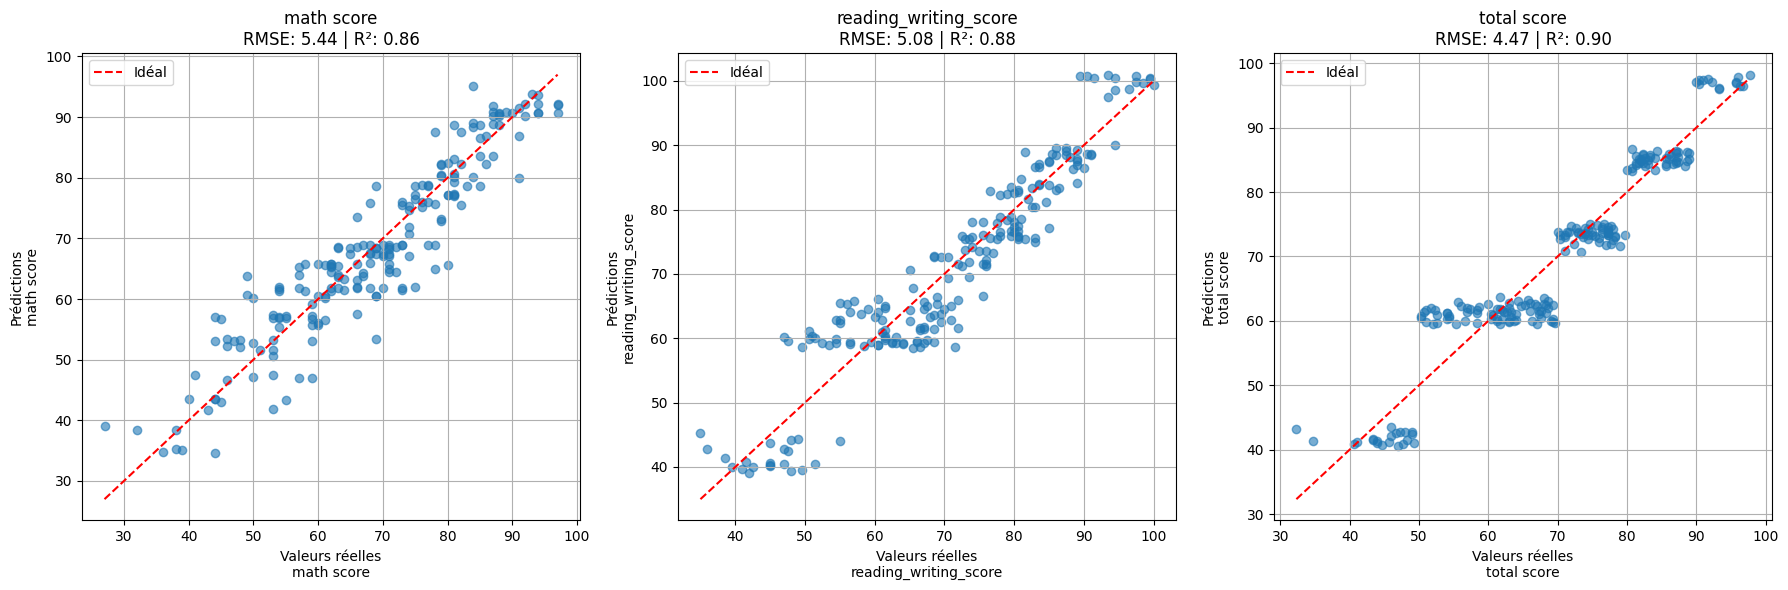

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Supposons que train_data et test_data sont déjà chargés
target_columns = ['math score', 'reading_writing_score', 'total score']

X_train = train_data.drop(columns=target_columns)
X_test = test_data.drop(columns=target_columns)

y_train = train_data[target_columns]
y_test = test_data[target_columns]

# Le scaling est souvent utile pour la régression linéaire
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser LinearRegression et MultiOutputRegressor
lr = LinearRegression()
multi_lr = MultiOutputRegressor(lr)
multi_lr.fit(X_train_scaled, y_train)

# Prédiction sur test
y_pred_test = multi_lr.predict(X_test_scaled)

# Convertir prédictions en DataFrame
predictions = pd.DataFrame(y_pred_test, index=test_data.index, columns=target_columns)

# Évaluation et affichage console
for target in target_columns:
    rmse = np.sqrt(mean_squared_error(y_test[target], predictions[target]))
    r2 = r2_score(y_test[target], predictions[target])
    results.append({
        'Modèle': 'LR',
        'Cible': target,
        'RMSE': rmse,
        'R2': r2
    })
    print(f"Résultats pour {target} (Test):")
    print(f" - RMSE: {rmse:.3f}")
    print(f" - R² score: {r2:.3f}")
    print("-" * 40)

# Ajouter prédictions au DataFrame test
test_data_with_predictions = pd.concat([test_data, predictions.add_prefix('predicted_')], axis=1)

# Calculer erreur absolue par cible
for target in target_columns:
    pred_col = f'predicted_{target}'
    error_col = f'error_{target}'
    test_data_with_predictions[error_col] = abs(test_data_with_predictions[target] - test_data_with_predictions[pred_col])

print(test_data_with_predictions.head(10))

# Affichage des 3 graphiques côte à côte
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, target in enumerate(target_columns):
    y_true = test_data_with_predictions[target]
    y_pred = test_data_with_predictions[f'predicted_{target}']

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    ax = axes[i]
    ax.scatter(y_true, y_pred, alpha=0.6)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Idéal')
    ax.set_xlabel(f'Valeurs réelles\n{target}')
    ax.set_ylabel(f'Prédictions\n{target}')
    ax.set_title(f'{target}\nRMSE: {rmse:.2f} | R²: {r2:.2f}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


# **K-Nearest Neighbors Regressor (KNN)**

Résultats pour math score (Test):
 - RMSE: 7.461
 - R² score: 0.744
----------------------------------------
Résultats pour reading_writing_score (Test):
 - RMSE: 6.771
 - R² score: 0.792
----------------------------------------
Résultats pour total score (Test):
 - RMSE: 6.293
 - R² score: 0.805
----------------------------------------
   gender  parental level of education  lunch  test preparation course  \
0       0                            1      0                        1   
1       1                            4      0                        0   
2       1                            4      0                        0   
3       0                            3      1                        0   
4       1                            0      0                        1   
5       1                            1      1                        0   
6       1                            0      1                        1   
7       0                            4      1                        

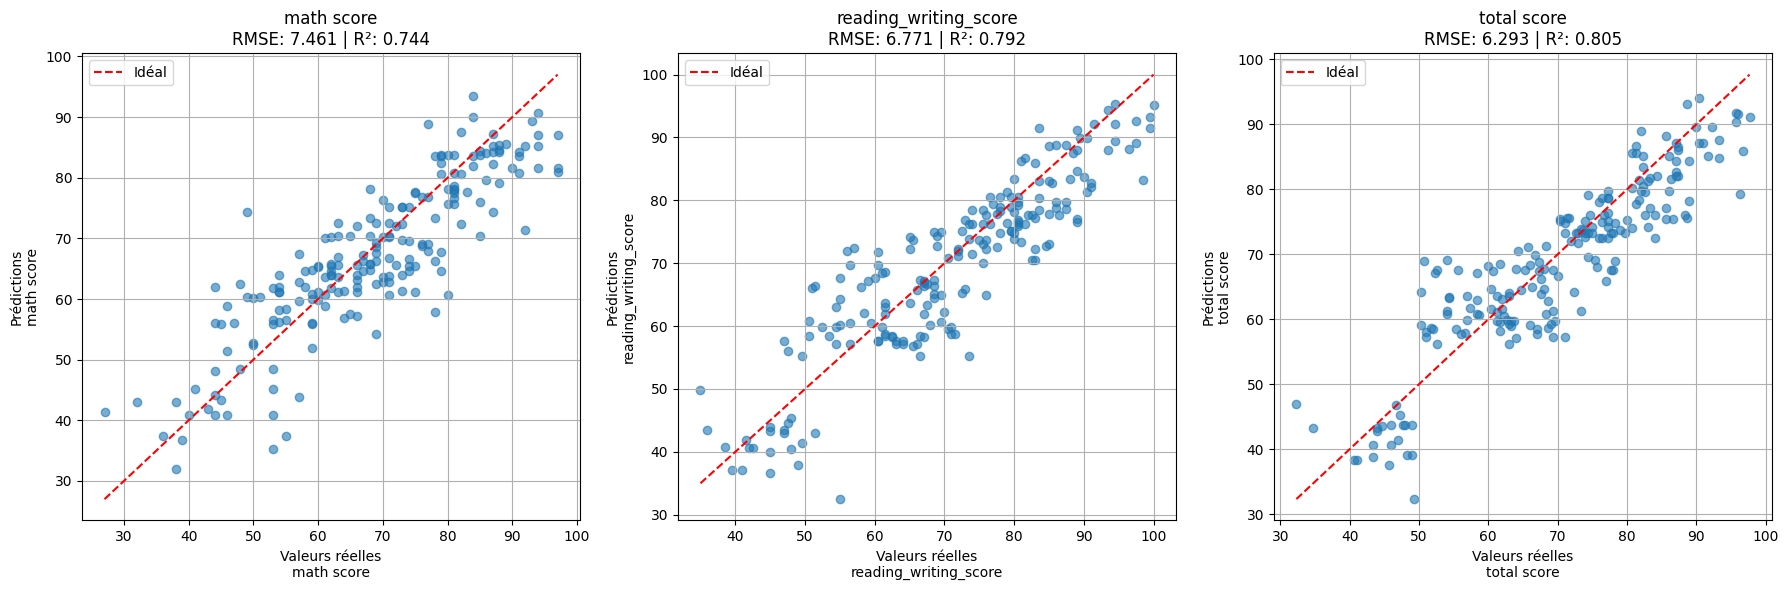

In [31]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cibles à prédire
target_columns = ['math score', 'reading_writing_score', 'total score']

# Séparation des variables d'entrée et des cibles
X_train = train_data.drop(columns=target_columns)
X_test = test_data.drop(columns=target_columns)

y_train = train_data[target_columns]
y_test = test_data[target_columns]

# Standardisation des données (KNN est sensible aux échelles)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialisation du modèle KNN
knn = KNeighborsRegressor(n_neighbors=5)
multi_knn = MultiOutputRegressor(knn)
multi_knn.fit(X_train_scaled, y_train)

# Prédictions sur les données de test
y_pred_test = multi_knn.predict(X_test_scaled)

# Conversion des prédictions en DataFrame
predictions = pd.DataFrame(y_pred_test, index=test_data.index, columns=target_columns)
# Évaluation et affichage des performances
for target in target_columns:
    rmse = np.sqrt(mean_squared_error(y_test[target], predictions[target]))
    r2 = r2_score(y_test[target], predictions[target])
    results.append({
        'Modèle': 'KNN',
        'Cible': target,
        'RMSE': rmse,
        'R2': r2
    })
    print(f"Résultats pour {target} (Test):")
    print(f" - RMSE: {rmse:.3f}")
    print(f" - R² score: {r2:.3f}")
    print("-" * 40)

# Ajout des prédictions au DataFrame de test
test_data_with_predictions = pd.concat([test_data, predictions.add_prefix('predicted_')], axis=1)

# Calcul des erreurs absolues
for target in target_columns:
    pred_col = f'predicted_{target}'
    error_col = f'error_{target}'
    test_data_with_predictions[error_col] = abs(test_data_with_predictions[target] - test_data_with_predictions[pred_col])

# Affichage des 10 premières lignes
print(test_data_with_predictions.head(10))

# Visualisation : les 3 graphiques côte à côte
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, target in enumerate(target_columns):
    y_true = test_data_with_predictions[target]
    y_pred = test_data_with_predictions[f'predicted_{target}']

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    ax = axes[i]
    ax.scatter(y_true, y_pred, alpha=0.6)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Idéal')
    ax.set_xlabel(f'Valeurs réelles\n{target}')
    ax.set_ylabel(f'Prédictions\n{target}')
    ax.set_title(f'{target}\nRMSE: {rmse:.3f} | R²: {r2:.3f}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()



# **Decision Tree Regressor**

Résultats pour math score (Test):
 - RMSE: 7.015
 - R² score: 0.774
----------------------------------------
Résultats pour reading_writing_score (Test):
 - RMSE: 6.526
 - R² score: 0.806
----------------------------------------
Résultats pour total score (Test):
 - RMSE: 5.779
 - R² score: 0.835
----------------------------------------
   gender  parental level of education  lunch  test preparation course  \
0       0                            1      0                        1   
1       1                            4      0                        0   
2       1                            4      0                        0   
3       0                            3      1                        0   
4       1                            0      0                        1   
5       1                            1      1                        0   
6       1                            0      1                        1   
7       0                            4      1                        

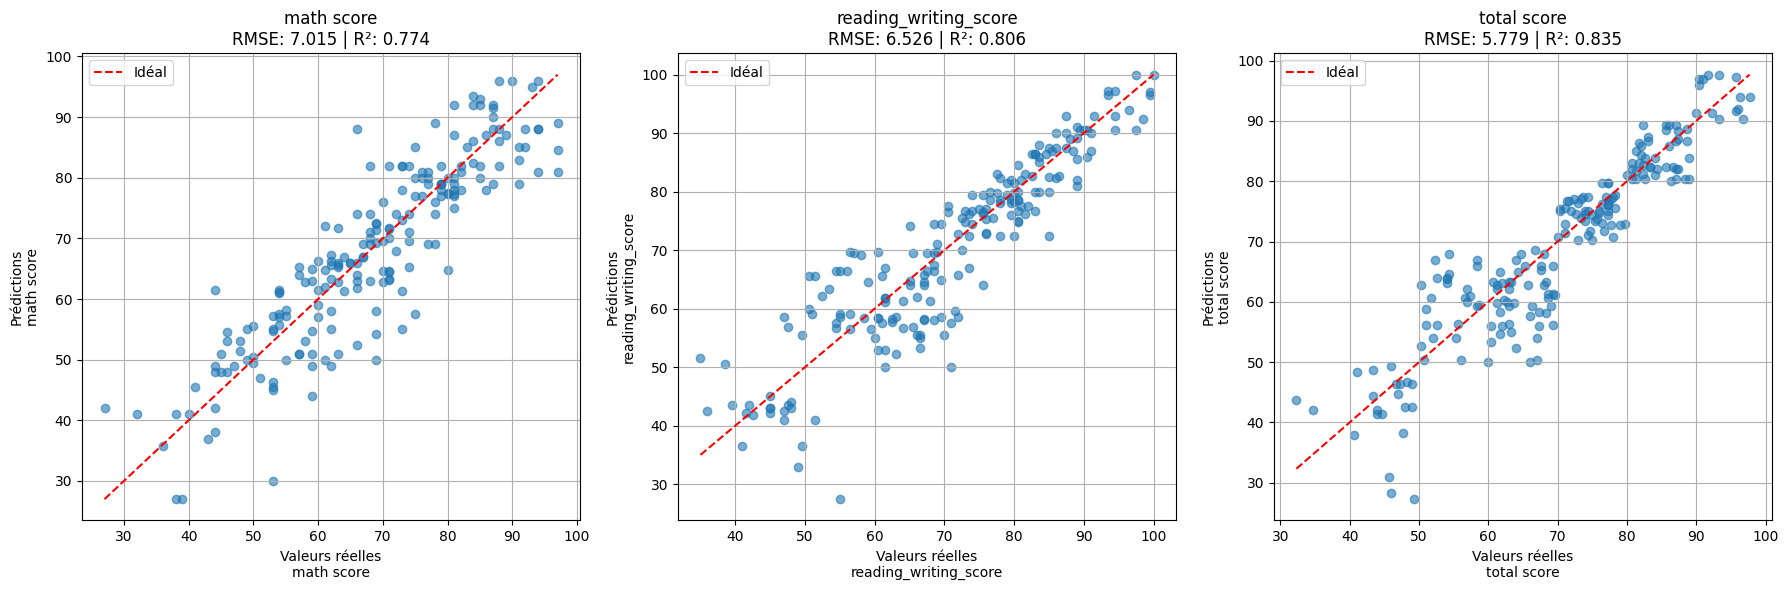

In [32]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cibles
target_columns = ['math score', 'reading_writing_score', 'total score']

# Séparer les features et les cibles
X_train = train_data.drop(columns=target_columns)
X_test = test_data.drop(columns=target_columns)

y_train = train_data[target_columns]
y_test = test_data[target_columns]

# Standardisation (pas obligatoire ici, mais pour rester cohérent)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle Decision Tree
tree = DecisionTreeRegressor(random_state=42)
multi_tree = MultiOutputRegressor(tree)
multi_tree.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
y_pred_test = multi_tree.predict(X_test_scaled)

# Mettre les prédictions dans un DataFrame
predictions = pd.DataFrame(y_pred_test, index=test_data.index, columns=target_columns)

# Évaluer et afficher les performances
for target in target_columns:
    rmse = np.sqrt(mean_squared_error(y_test[target], predictions[target]))
    r2 = r2_score(y_test[target], predictions[target])
    results.append({
        'Modèle': 'DT',
        'Cible': target,
        'RMSE': rmse,
        'R2': r2
    })
    print(f"Résultats pour {target} (Test):")
    print(f" - RMSE: {rmse:.3f}")
    print(f" - R² score: {r2:.3f}")
    print("-" * 40)

# Ajouter les prédictions au DataFrame test
test_data_with_predictions = pd.concat([test_data, predictions.add_prefix('predicted_')], axis=1)

# Calcul des erreurs absolues
for target in target_columns:
    pred_col = f'predicted_{target}'
    error_col = f'error_{target}'
    test_data_with_predictions[error_col] = abs(test_data_with_predictions[target] - test_data_with_predictions[pred_col])

# Afficher les premières lignes
print(test_data_with_predictions.head(10))

# Visualiser les résultats en une figure avec 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, target in enumerate(target_columns):
    y_true = test_data_with_predictions[target]
    y_pred = test_data_with_predictions[f'predicted_{target}']

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    ax = axes[i]
    ax.scatter(y_true, y_pred, alpha=0.6)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Idéal')
    ax.set_xlabel(f'Valeurs réelles\n{target}')
    ax.set_ylabel(f'Prédictions\n{target}')
    ax.set_title(f'{target}\nRMSE: {rmse:.3f} | R²: {r2:.3f}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


#**Choix du meilleur modéle  de prédiction**

In [33]:
results_df = pd.DataFrame(results)
print(results_df)

          Modèle                  Cible      RMSE        R2
0            SVR             math score  7.121207  0.767025
1            SVR  reading_writing_score  6.212430  0.824650
2            SVR            total score  5.745837  0.837199
3   RandomForest             math score  5.998582  0.834690
4   RandomForest  reading_writing_score  5.820043  0.846101
5   RandomForest            total score  4.959593  0.878705
6            GBR             math score  5.628274  0.854470
7            GBR  reading_writing_score  5.277675  0.873448
8            GBR            total score  4.517604  0.899361
9            XGB             math score  6.457176  0.808448
10           XGB  reading_writing_score  6.420159  0.812727
11           XGB            total score  5.623861  0.844037
12            LR             math score  5.437722  0.864158
13            LR  reading_writing_score  5.084888  0.882525
14            LR            total score  4.471401  0.901409
15           KNN             math score 


=== 📈 Graphiques RMSE ===

📊 RMSE pour 'math score'
╒══════════════╤════════════╤════════╤════════╕
│ Modèle       │ Cible      │   RMSE │     R2 │
╞══════════════╪════════════╪════════╪════════╡
│ LR           │ math score │ 5.4377 │ 0.8642 │
├──────────────┼────────────┼────────┼────────┤
│ GBR          │ math score │ 5.6283 │ 0.8545 │
├──────────────┼────────────┼────────┼────────┤
│ RandomForest │ math score │ 5.9986 │ 0.8347 │
├──────────────┼────────────┼────────┼────────┤
│ XGB          │ math score │ 6.4572 │ 0.8084 │
├──────────────┼────────────┼────────┼────────┤
│ DT           │ math score │ 7.0149 │ 0.7739 │
├──────────────┼────────────┼────────┼────────┤
│ SVR          │ math score │ 7.1212 │ 0.7670 │
├──────────────┼────────────┼────────┼────────┤
│ KNN          │ math score │ 7.4610 │ 0.7443 │
╘══════════════╧════════════╧════════╧════════╛

📊 RMSE pour 'reading_writing_score'
╒══════════════╤═══════════════════════╤════════╤════════╕
│ Modèle       │ Cible             

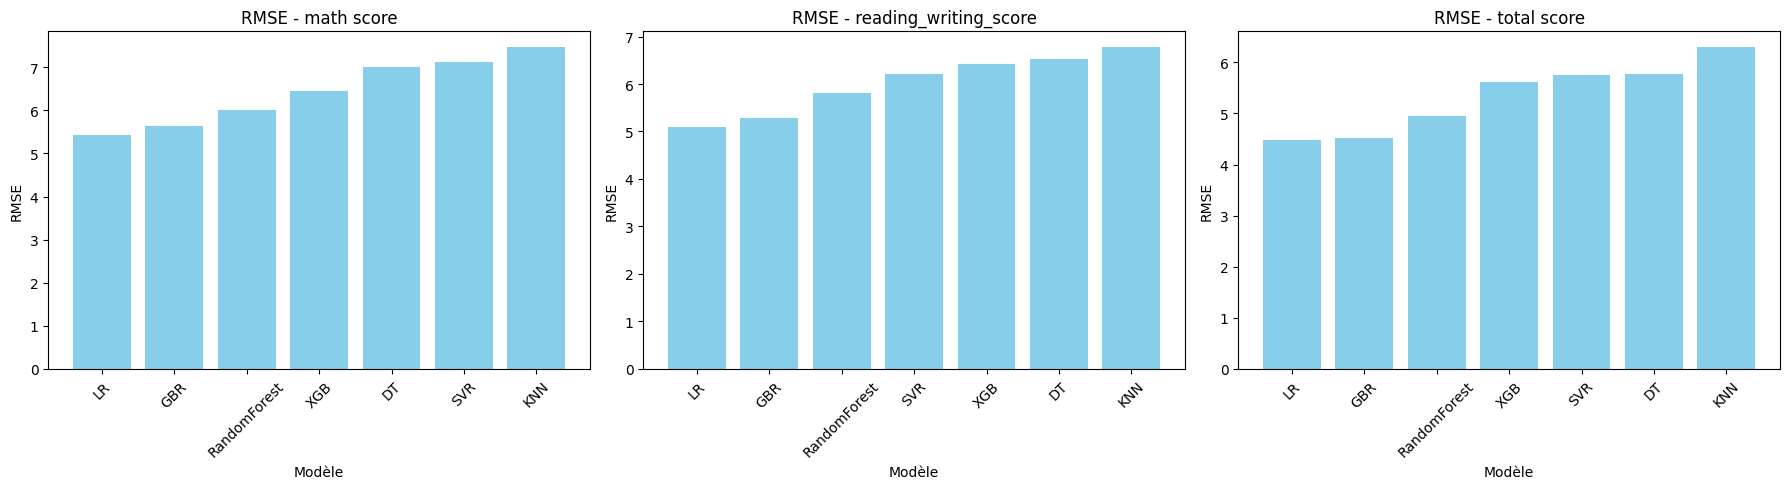


=== 📈 Graphiques R2 ===

📊 R2 pour 'math score'
╒══════════════╤════════════╤════════╤════════╕
│ Modèle       │ Cible      │   RMSE │     R2 │
╞══════════════╪════════════╪════════╪════════╡
│ LR           │ math score │ 5.4377 │ 0.8642 │
├──────────────┼────────────┼────────┼────────┤
│ GBR          │ math score │ 5.6283 │ 0.8545 │
├──────────────┼────────────┼────────┼────────┤
│ RandomForest │ math score │ 5.9986 │ 0.8347 │
├──────────────┼────────────┼────────┼────────┤
│ XGB          │ math score │ 6.4572 │ 0.8084 │
├──────────────┼────────────┼────────┼────────┤
│ DT           │ math score │ 7.0149 │ 0.7739 │
├──────────────┼────────────┼────────┼────────┤
│ SVR          │ math score │ 7.1212 │ 0.7670 │
├──────────────┼────────────┼────────┼────────┤
│ KNN          │ math score │ 7.4610 │ 0.7443 │
╘══════════════╧════════════╧════════╧════════╛

📊 R2 pour 'reading_writing_score'
╒══════════════╤═══════════════════════╤════════╤════════╕
│ Modèle       │ Cible                 │ 

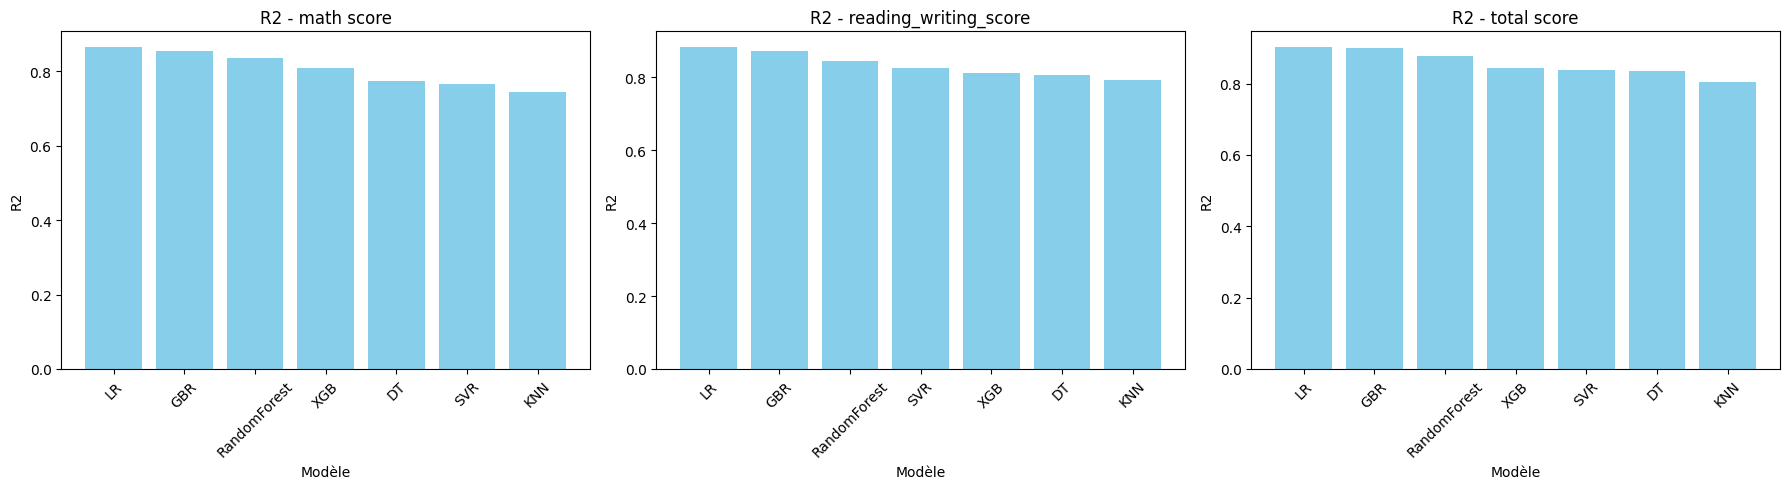

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Fonction d'affichage en tableau
def print_styled_table(title, df_target):
    print(f"\n📊 {title}")
    table = tabulate(df_target, headers='keys', tablefmt='fancy_grid', showindex=False, floatfmt=".4f")
    print(table)

# Fonction pour trier les résultats selon une métrique et une cible
def get_sorted_results(df, target_col, metric='RMSE', ascending=True):
    return df[df['Cible'] == target_col].sort_values(by=metric, ascending=ascending)

# Fonction de visualisation multiple côte à côte
def plot_multiple_sorted_results(df, targets, metric_column):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 ligne, 3 colonnes

    for i, target in enumerate(targets):
        ascending = (metric_column == 'RMSE')
        sorted_results = get_sorted_results(df, target, metric_column, ascending=ascending)
        axes[i].bar(sorted_results['Modèle'], sorted_results[metric_column], color='skyblue')
        axes[i].set_title(f"{metric_column} - {target}")
        axes[i].set_xlabel("Modèle")
        axes[i].set_ylabel(metric_column)
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Liste des cibles et des métriques
targets = ['math score', 'reading_writing_score', 'total score']
metrics = ['RMSE', 'R2']

# Affichage des tableaux et des graphes groupés
for metric in metrics:
    print(f"\n=== 📈 Graphiques {metric} ===")
    for target in targets:
        sorted_results = get_sorted_results(results_df, target, metric, ascending=(metric == 'RMSE'))
        print_styled_table(f"{metric} pour '{target}'", sorted_results)
    plot_multiple_sorted_results(results_df, targets, metric)

